In [68]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
# Construct dataset
# Gaussian 1
X1, y1 = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)
# Gaussian 2
X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1,
                                 n_samples=500, n_features=2,
                                 n_classes=2, random_state=1)
X2 = pd.DataFrame(X2,columns=['x','y'])
y2 = pd.Series(y2)
# Combine the gaussians
X1.shape
X2.shape
df = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))


In [70]:
df['y'] = y

In [75]:
df['y'].value_counts()

0    506
1    494
Name: y, dtype: int64

In [74]:
df = df.sample(1500)[0:1000]

In [76]:
import matplotlib.pyplot as plt

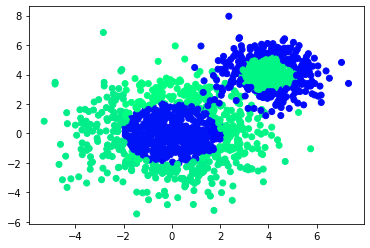

In [77]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=X.iloc[:,-1],cmap='winter')

In [80]:
# Log of the odds
df['pre1'] = np.log(494/506)

In [108]:
np.log(494/506)

-0.024001152099543014

In [81]:
df

,0,1,y,pre1
1083,3.477644,3.630744,1,-0.024001
1015,5.033451,3.853727,1,-0.024001
968,-0.650013,-1.106314,0,-0.024001
159,0.733514,0.133957,0,-0.024001
776,0.294222,-2.016121,0,-0.024001
...,...,...,...,...
1319,5.627651,4.338012,0,-0.024001
1341,3.581062,3.520815,1,-0.024001
758,1.809983,1.053978,1,-0.024001
1475,4.495211,3.825297,1,-0.024001


In [82]:
# Calculating probability

p = np.exp(-0.024001)/(1+np.exp(-0.024001))

In [83]:
p

0.4940000380194102

In [86]:
df['pre1'] = 0.5

In [87]:
df

,0,1,y,pre1
1083,3.477644,3.630744,1,0.5
1015,5.033451,3.853727,1,0.5
968,-0.650013,-1.106314,0,0.5
159,0.733514,0.133957,0,0.5
776,0.294222,-2.016121,0,0.5
...,...,...,...,...
1319,5.627651,4.338012,0,0.5
1341,3.581062,3.520815,1,0.5
758,1.809983,1.053978,1,0.5
1475,4.495211,3.825297,1,0.5


In [88]:
df['res1'] = df['y'] - df['pre1']

In [90]:
df

,0,1,y,pre1,res1
1083,3.477644,3.630744,1,0.5,0.5
1015,5.033451,3.853727,1,0.5,0.5
968,-0.650013,-1.106314,0,0.5,-0.5
159,0.733514,0.133957,0,0.5,-0.5
776,0.294222,-2.016121,0,0.5,-0.5
...,...,...,...,...,...
1319,5.627651,4.338012,0,0.5,-0.5
1341,3.581062,3.520815,1,0.5,0.5
758,1.809983,1.053978,1,0.5,0.5
1475,4.495211,3.825297,1,0.5,0.5


In [91]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=4)

In [95]:
tree1.fit(X.iloc[:,0:2],X.iloc[:,-1])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=4,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(133.92000000000002, 190.26, 'X[1] <= -1.817\nmse = 0.235\nsamples = 1500\nvalue = 0.0'),
 Text(66.96000000000001, 135.9, 'mse = 0.021\nsamples = 140\nvalue = 0.431'),
 Text(200.88000000000002, 135.9, 'X[1] <= 1.591\nmse = 0.236\nsamples = 1360\nvalue = -0.044'),
 Text(133.92000000000002, 81.53999999999999, 'X[0] <= 2.03\nmse = 0.19\nsamples = 676\nvalue = -0.188'),
 Text(66.96000000000001, 27.180000000000007, 'mse = 0.14\nsamples = 584\nvalue = -0.288'),
 Text(200.88000000000002, 27.180000000000007, 'mse = 0.042\nsamples = 92\nvalue = 0.448'),
 Text(267.84000000000003, 81.53999999999999, 'mse = 0.241\nsamples = 684\nvalue = 0.098')]

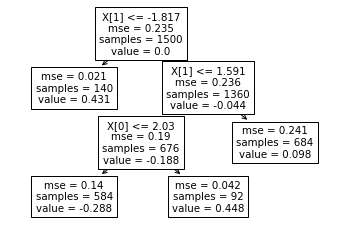

In [97]:
from sklearn.tree import plot_tree
plot_tree(tree1) 

In [99]:
df['leaf_index1'] = tree1.apply(df.iloc[:,0:2])

In [102]:
df

,0,1,y,pre1,res1,leaf_index1
1083,3.477644,3.630744,1,0.5,0.5,4
1015,5.033451,3.853727,1,0.5,0.5,4
968,-0.650013,-1.106314,0,0.5,-0.5,5
159,0.733514,0.133957,0,0.5,-0.5,5
776,0.294222,-2.016121,0,0.5,-0.5,1
...,...,...,...,...,...,...
1319,5.627651,4.338012,0,0.5,-0.5,4
1341,3.581062,3.520815,1,0.5,0.5,4
758,1.809983,1.053978,1,0.5,0.5,5
1475,4.495211,3.825297,1,0.5,0.5,4


In [101]:
df['leaf_index1'].value_counts()

4    467
5    385
1     84
6     64
Name: leaf_index1, dtype: int64

In [34]:
tree1.tree_.node_count

7

In [35]:
from sklearn.tree import plot_tree

[Text(111.60000000000001, 190.26, 'X[1] <= -1.817\nmse = 0.25\nsamples = 1500\nvalue = 0.0'),
 Text(55.800000000000004, 135.9, 'mse = 0.021\nsamples = 140\nvalue = 0.479'),
 Text(167.4, 135.9, 'X[0] <= -1.96\nmse = 0.248\nsamples = 1360\nvalue = -0.049'),
 Text(111.60000000000001, 81.53999999999999, 'mse = 0.0\nsamples = 103\nvalue = 0.5'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 1.612\nmse = 0.241\nsamples = 1257\nvalue = -0.094'),
 Text(167.4, 27.180000000000007, 'mse = 0.163\nsamples = 602\nvalue = -0.296'),
 Text(279.0, 27.180000000000007, 'mse = 0.242\nsamples = 655\nvalue = 0.091')]

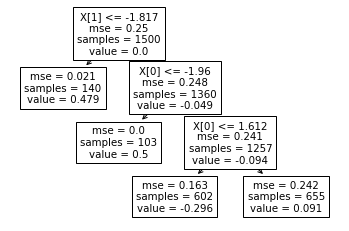

In [36]:
plot_tree(tree1)

In [38]:
X

,0,1,y,pre1,res1,leaf_index1
0,-1.396342,0.084977,0,0.5,-0.5,5
1,1.878268,-0.190694,0,0.5,-0.5,6
2,-1.910399,1.315481,1,0.5,0.5,5
3,1.517623,0.213485,0,0.5,-0.5,5
4,-3.422065,-1.020059,1,0.5,0.5,3
...,...,...,...,...,...,...
1495,5.044994,4.608515,0,0.5,-0.5,6
1496,3.533845,5.384991,0,0.5,-0.5,6
1497,4.309817,5.051321,1,0.5,0.5,6
1498,5.693809,4.196870,0,0.5,-0.5,6


In [53]:
X['leaf_index1'].value_counts().index

Int64Index([6, 5, 1, 3], dtype='int64')

In [ ]:
def return_lo()

In [41]:
num6 = X[X['leaf_index1'] == 6]['res1'].sum()

In [47]:
den6 = sum(X[X['leaf_index1'] == 6]['pre1'] * (1 - X[X['leaf_index1'] == 6]['pre1']))

In [46]:
num6

59.5

In [49]:
round(num6/den6,2)

0.36

In [105]:
def return_logs(leaf):
  num = df[df['leaf_index1'] == leaf]['res1'].sum()
  den = sum(df[df['leaf_index1'] == leaf]['pre1'] * (1 - df[df['leaf_index1'] == leaf]['pre1']))
  return round(num/den,2)




In [106]:
df['log1'] = df['leaf_index1'].apply(return_logs)

In [107]:
df

,0,1,y,pre1,res1,leaf_index1,log1
1083,3.477644,3.630744,1,0.5,0.5,4,0.37
1015,5.033451,3.853727,1,0.5,0.5,4,0.37
968,-0.650013,-1.106314,0,0.5,-0.5,5,-1.23
159,0.733514,0.133957,0,0.5,-0.5,5,-1.23
776,0.294222,-2.016121,0,0.5,-0.5,1,1.95
...,...,...,...,...,...,...,...
1319,5.627651,4.338012,0,0.5,-0.5,4,0.37
1341,3.581062,3.520815,1,0.5,0.5,4,0.37
758,1.809983,1.053978,1,0.5,0.5,5,-1.23
1475,4.495211,3.825297,1,0.5,0.5,4,0.37


In [109]:
df['pre2'] = -0.024 + df['log1']

In [111]:
df['pre2'] = np.exp(df['pre2'])/(1 + np.exp(df['pre2']))

In [112]:
df

,0,1,y,pre1,res1,leaf_index1,log1,pre2
1083,3.477644,3.630744,1,0.5,0.5,4,0.37,0.585647
1015,5.033451,3.853727,1,0.5,0.5,4,0.37,0.585647
968,-0.650013,-1.106314,0,0.5,-0.5,5,-1.23,0.222008
159,0.733514,0.133957,0,0.5,-0.5,5,-1.23,0.222008
776,0.294222,-2.016121,0,0.5,-0.5,1,1.95,0.872806
...,...,...,...,...,...,...,...,...
1319,5.627651,4.338012,0,0.5,-0.5,4,0.37,0.585647
1341,3.581062,3.520815,1,0.5,0.5,4,0.37,0.585647
758,1.809983,1.053978,1,0.5,0.5,5,-1.23,0.222008
1475,4.495211,3.825297,1,0.5,0.5,4,0.37,0.585647


In [113]:
df['res2'] = df['y'] - df['pre2']

In [114]:
df

,0,1,y,pre1,res1,leaf_index1,log1,pre2,res2
1083,3.477644,3.630744,1,0.5,0.5,4,0.37,0.585647,0.414353
1015,5.033451,3.853727,1,0.5,0.5,4,0.37,0.585647,0.414353
968,-0.650013,-1.106314,0,0.5,-0.5,5,-1.23,0.222008,-0.222008
159,0.733514,0.133957,0,0.5,-0.5,5,-1.23,0.222008,-0.222008
776,0.294222,-2.016121,0,0.5,-0.5,1,1.95,0.872806,-0.872806
...,...,...,...,...,...,...,...,...,...
1319,5.627651,4.338012,0,0.5,-0.5,4,0.37,0.585647,-0.585647
1341,3.581062,3.520815,1,0.5,0.5,4,0.37,0.585647,0.414353
758,1.809983,1.053978,1,0.5,0.5,5,-1.23,0.222008,0.777992
1475,4.495211,3.825297,1,0.5,0.5,4,0.37,0.585647,0.414353
